<a href="https://colab.research.google.com/github/King-of-Haskul/Harvard-CS50x/blob/master/Dogs_vs_Cats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
!mv /content/drive/MyDrive/Datasets/Cats-vs-dogs /content

In [12]:
import os
base_dir = '/content/Cats-vs-dogs'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

### Instantiating a small covnet
NOTE: As the depth of the feature maps progressively increases in the network (from 32 to 128), whereas the size of the feature maps decreases (fom 148x148 to 7x7).

In [3]:
from tensorflow import keras

model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)))
model.add(keras.layers.MaxPooling2D((2,2)))

model.add(keras.layers.Conv2D(64, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))

model.add(keras.layers.Conv2D(128, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))

model.add(keras.layers.Conv2D(128, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [5]:
model.compile(loss = 'binary_crossentropy',
             optimizer= keras.optimizers.RMSprop(learning_rate=1e-4),
             metrics= ['accuracy'])

### Data Preprocessing
1. Read the picture files
2. Decode the JPEG content to RGB grids of pixels
3. Convert these into floating-point tensors
4. Rescale the pixel values (between 0 and 255) to the [0,1] interval

In [13]:
#Reading images from directories using data generators
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255) #Rescaling images by 1/255
test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
            train_dir, #Target directory
            target_size=(150,150), #Resize all images to 150 x 150
            batch_size=20,
            class_mode='binary') #since we use binary_crossentropy loss, we need binary labels

validation_generator = test_datagen.flow_from_directory(
            validation_dir,
            target_size=(150,150),
            batch_size=20,
            class_mode='binary')
#These generators yields batches of 150 x 150 RGB 20 images (shape (20,150,150,3)) and binary labels (shape (20, ))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [14]:
#An example of how these data generators work
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels bacth shape:', labels_batch.shape)
    break;


data batch shape: (20, 150, 150, 3)
labels bacth shape: (20,)


### Fitting the model using a batch generator

In [15]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100, #number of batches to draw from the generator in each epoch
    epochs = 30,
    validation_data = validation_generator,
    validation_steps=50 #number of batches to draw from the validation generator for evaluation
    )

Epoch 1/30
  1/100 [..............................] - ETA: 8s - loss: 0.6911 - accuracy: 0.5000

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


100/100 [==============================] - 9s 89ms/step - loss: 0.6884 - accuracy: 0.5460 - val_loss: 0.6771 - val_accuracy: 0.5330
Epoch 2/30
100/100 [==============================] - 9s 87ms/step - loss: 0.6598 - accuracy: 0.6085 - val_loss: 0.6432 - val_accuracy: 0.6190
Epoch 3/30
100/100 [==============================] - 9s 86ms/step - loss: 0.6120 - accuracy: 0.6660 - val_loss: 0.6093 - val_accuracy: 0.6500
Epoch 4/30
100/100 [==============================] - 8s 85ms/step - loss: 0.5681 - accuracy: 0.7010 - val_loss: 0.5978 - val_accuracy: 0.6740
Epoch 5/30
100/100 [==============================] - 9s 86ms/step - loss: 0.5489 - accuracy: 0.7165 - val_loss: 0.5886 - val_accuracy: 0.6880
Epoch 6/30
100/100 [==============================] - 9s 87ms/step - loss: 0.5256 - accuracy: 0.7465 - val_loss: 0.5821 - val_accuracy: 0.6840
Epoch 7/30
100/100 [==============================] - 9s 86ms/step - loss: 0.4940 - accuracy: 0.7620 - val_loss: 0.5891 - val_accuracy: 0.6890
Epoch 8/30

In [16]:
model.save('/content/cats_and_dogs_small_1.h5')

### Curves of loss and accuracy during training

In [19]:
import matplotlib.pyplot as plt

def plot_curves(hist):
  acc = hist.history['accuracy']
  val_acc = hist.history['val_accuracy']
  loss = hist.history['loss']
  val_loss = hist.history['val_loss']

  epochs = range(1, len(acc)+1)

  plt.plot(epochs, acc, 'bo', label='Training accuracy')
  plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
  plt.title('Training and validation accuracy')
  plt.legend()

  plt.figure()

  plt.plot(epochs, loss, 'bo', label='Training loss')
  plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
  plt.title('Training and validation loss')
  plt.legend()

  plt.show()

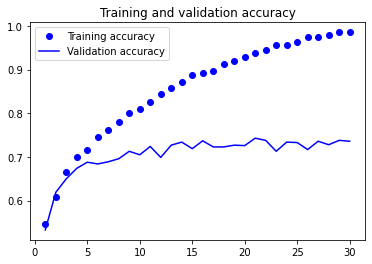

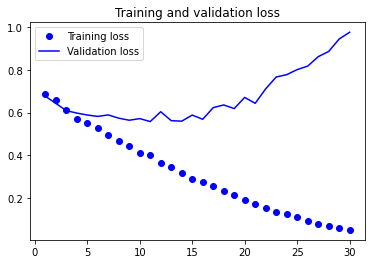

In [20]:
plot_curves(history)

### Data Augmentation

In [24]:
#Data augmentation can be done in keras by configuring a number of random transformations to be performed on the images read by the ImageDataGenerator instance
datagen = ImageDataGenerator(
    rotation_range=40, #range (0-40) within which to randomly rotate pictures
    width_shift_range=0.2, #range as a fraction of total within which to randomly translate picture
    height_shift_range=0.2,
    shear_range=0.2, 
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest' #strategy used for filling in newly created pixels
)

Displaying some randomly augmented images

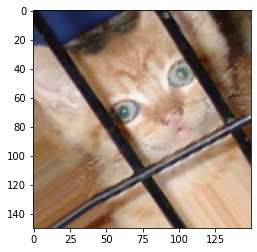

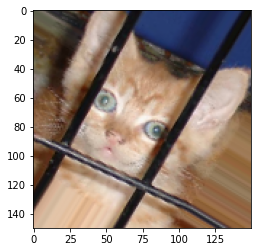

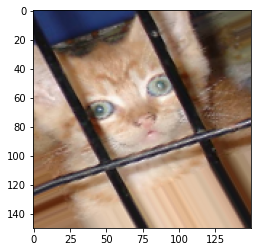

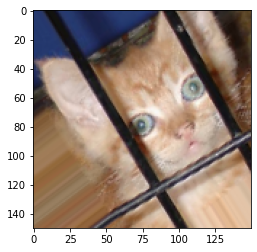

In [26]:
from tensorflow.keras.preprocessing import image

train_cats_dir = '/content/Cats-vs-dogs/train/cats'
fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]

img_path = fnames[3]  #choosing one image to augment

img = image.load_img(img_path, target_size=(150,150))   #Reading the image and resizing it

x = image.img_to_array(img)   #Converts image into Numpy array wiht shape (150,150,3)
x = x.reshape((1, x.shape[0], x.shape[1], x.shape[2]))  #datagen expects a tensor of rank 4

#Generating batches of randomly transformed images. It loops indefinitely, hence we added the break condition
i = 0
for batch in datagen.flow(x, batch_size = 1):
  plt.figure(i)
  imgplot = plt.imshow(image.array_to_img(batch[0]))  #array_to_img converts the Numpy array to image
  i += 1
  if i % 4 == 0:
    break

plt.show()                   

### Defining a new covnet that includes droput

In [27]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))  #Dropout layer with 50% dropout rate
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', 
              optimizer= keras.optimizers.RMSprop(learning_rate=1e-4), 
              metrics = ['accuracy'])

### Training the Covnet using data-augmentation generators

In [41]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
)

test_datagen = ImageDataGenerator(rescale=1./255) #Validation data doesn't needs to be augmented

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150,150),
    batch_size=32,
    class_mode='binary'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size = (150,150),
    batch_size=20,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [42]:
history = model.fit_generator(
    train_generator,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=50,
    verbose=0
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


In [44]:
model.save('/content/cats_and_dogs_small_2.h5')

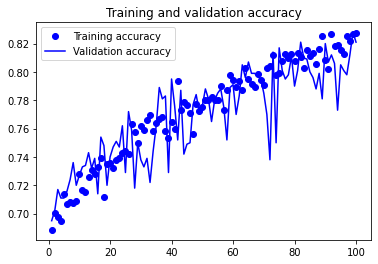

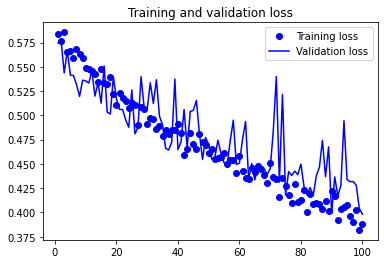

In [45]:
plot_curves(history)